In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [4]:
df=pd.read_csv("Hitters.csv",index_col=0)

In [6]:
df.dropna(inplace=True)
df=df._get_numeric_data()
df.head()

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,,,,,,,,,,,,,,,,
315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df=StandardScaler().fit_transform(df)

In [9]:
df[0:5]

array([[-0.59567545, -0.5285512 , -1.2061115 , -0.52206292, -0.0975271 ,
         1.3978935 ,  0.3467905 ,  0.1743734 , -0.0029198 , -0.12167086,
         0.25896561,  0.43533435,  1.22149851, -0.52319133,  0.21335208,
        -0.1353126 ],
       [ 0.49225957,  0.72996619,  0.44151497,  0.79405962,  1.6093726 ,
        -0.90120024, -0.45286539, -0.4098921 , -0.07605382, -0.41510491,
        -0.19959036,  0.010373  ,  2.10910888, -0.25386267,  0.81996395,
        -0.12420791],
       [ 0.73648988,  0.95878753,  0.40228577,  1.02631654, -0.18979195,
         0.77086793,  1.30155773,  1.31817358,  1.89856469,  1.41205144,
         1.57266648,  0.3556541 , -0.32466148, -0.74417894, -0.84821868,
        -0.07978915],
       [-0.46245892, -0.18531919, -0.61767348, -0.36722498, -0.51271892,
        -1.11020876, -0.99093521, -0.96015272, -0.69769298, -0.94752134,
        -0.88122761, -0.86231547,  1.84067833, -0.54390892, -0.69656571,
        -0.98704229],
       [ 1.35816704, -0.87178322,  0

In [10]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(df)

In [20]:
bilesen=pd.DataFrame(data=pca_fit,columns=["Birinci Bilesen","İkinci Bilesen"])

In [21]:
bilesen

,Birinci Bilesen,İkinci Bilesen
0,0.309005,1.493505
1,0.082704,-2.387913
2,3.398785,0.558305
3,-2.598835,-0.279177
4,0.735622,-1.111166
...,...,...
258,-0.286249,-0.055885
259,3.136885,-0.582022
260,-1.353714,-0.241913
261,1.760413,-2.077238


In [23]:
pca.explained_variance_ratio_
# yaklaşık olarak %68 başarı oranına sahip. Yani %32 veri kaybımız var

array([0.46545452, 0.21822719])

In [24]:
pca.components_

array([[ 0.16469524,  0.18366261,  0.16722946,  0.20866816,  0.19202526,
         0.29413203,  0.33743131,  0.33768571,  0.32279893,  0.34421269,
         0.34674504,  0.32463967,  0.07306365, -0.01407423, -0.02216234,
         0.24904707],
       [-0.42453879, -0.29500129, -0.43102062, -0.37664327, -0.28848725,
         0.25291168,  0.16961914,  0.15814645,  0.08969514,  0.1452548 ,
         0.13568149,  0.16403968, -0.20211044, -0.1728677 , -0.21799678,
        -0.10684027]])

Text(0, 0.5, 'Kümülatif varyans oranı ')

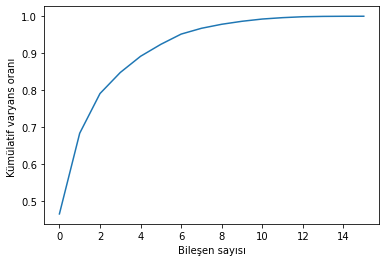

In [26]:
# optimum bileşen sayısı
pca=PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel("Bileşen sayısı")
plt.ylabel("Kümülatif varyans oranı ")

In [27]:
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)

In [28]:
pca.explained_variance_ratio_
#3 değişkenle yaklaşık %80 yeterliliğe ulaşıyoruz, 

array([0.46545452, 0.21822719, 0.10729789])